# Workflow of in-line data process of LDRD20-31 at XPD v2

# 1. Prepare Queueserver
https://blueskyproject.io/bluesky-queueserver/index.html

https://blueskyproject.io/bluesky-queueserver/re_manager_api.html

## 1.1 Turn on GUI qserver monitor GUI

### 1.1.1 Open terminal on the work station and enter the following commands
#### For ws3 at XPD beamline:

In [ ]:
~$ conda activate 2025-2.0-py310-tiled
~$ queue-monitor --zmq-control-addr tcp://xf28id2-ca2:60615 --zmq-info-addr tcp://xf28id2-ca2:60625

#### For ws1 at 1LL09 (two terminals):

In [ ]:
~$ conda activate 2025-2.0-py310-tiled
~$ start-re-manager --startup-dir ~/.ipython/profile_collection/startup --keep-re --redis-addr localhost:60737

In [ ]:
~$ conda activate 2025-2.2-py310-tiled
~$ queue-monitor

### 1.1.2 Connect to Queue server and opend RE environment

/tmp/ipykernel_3133214/3549640831.py:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


(-0.5, 1199.5, 1202.5, -0.5)

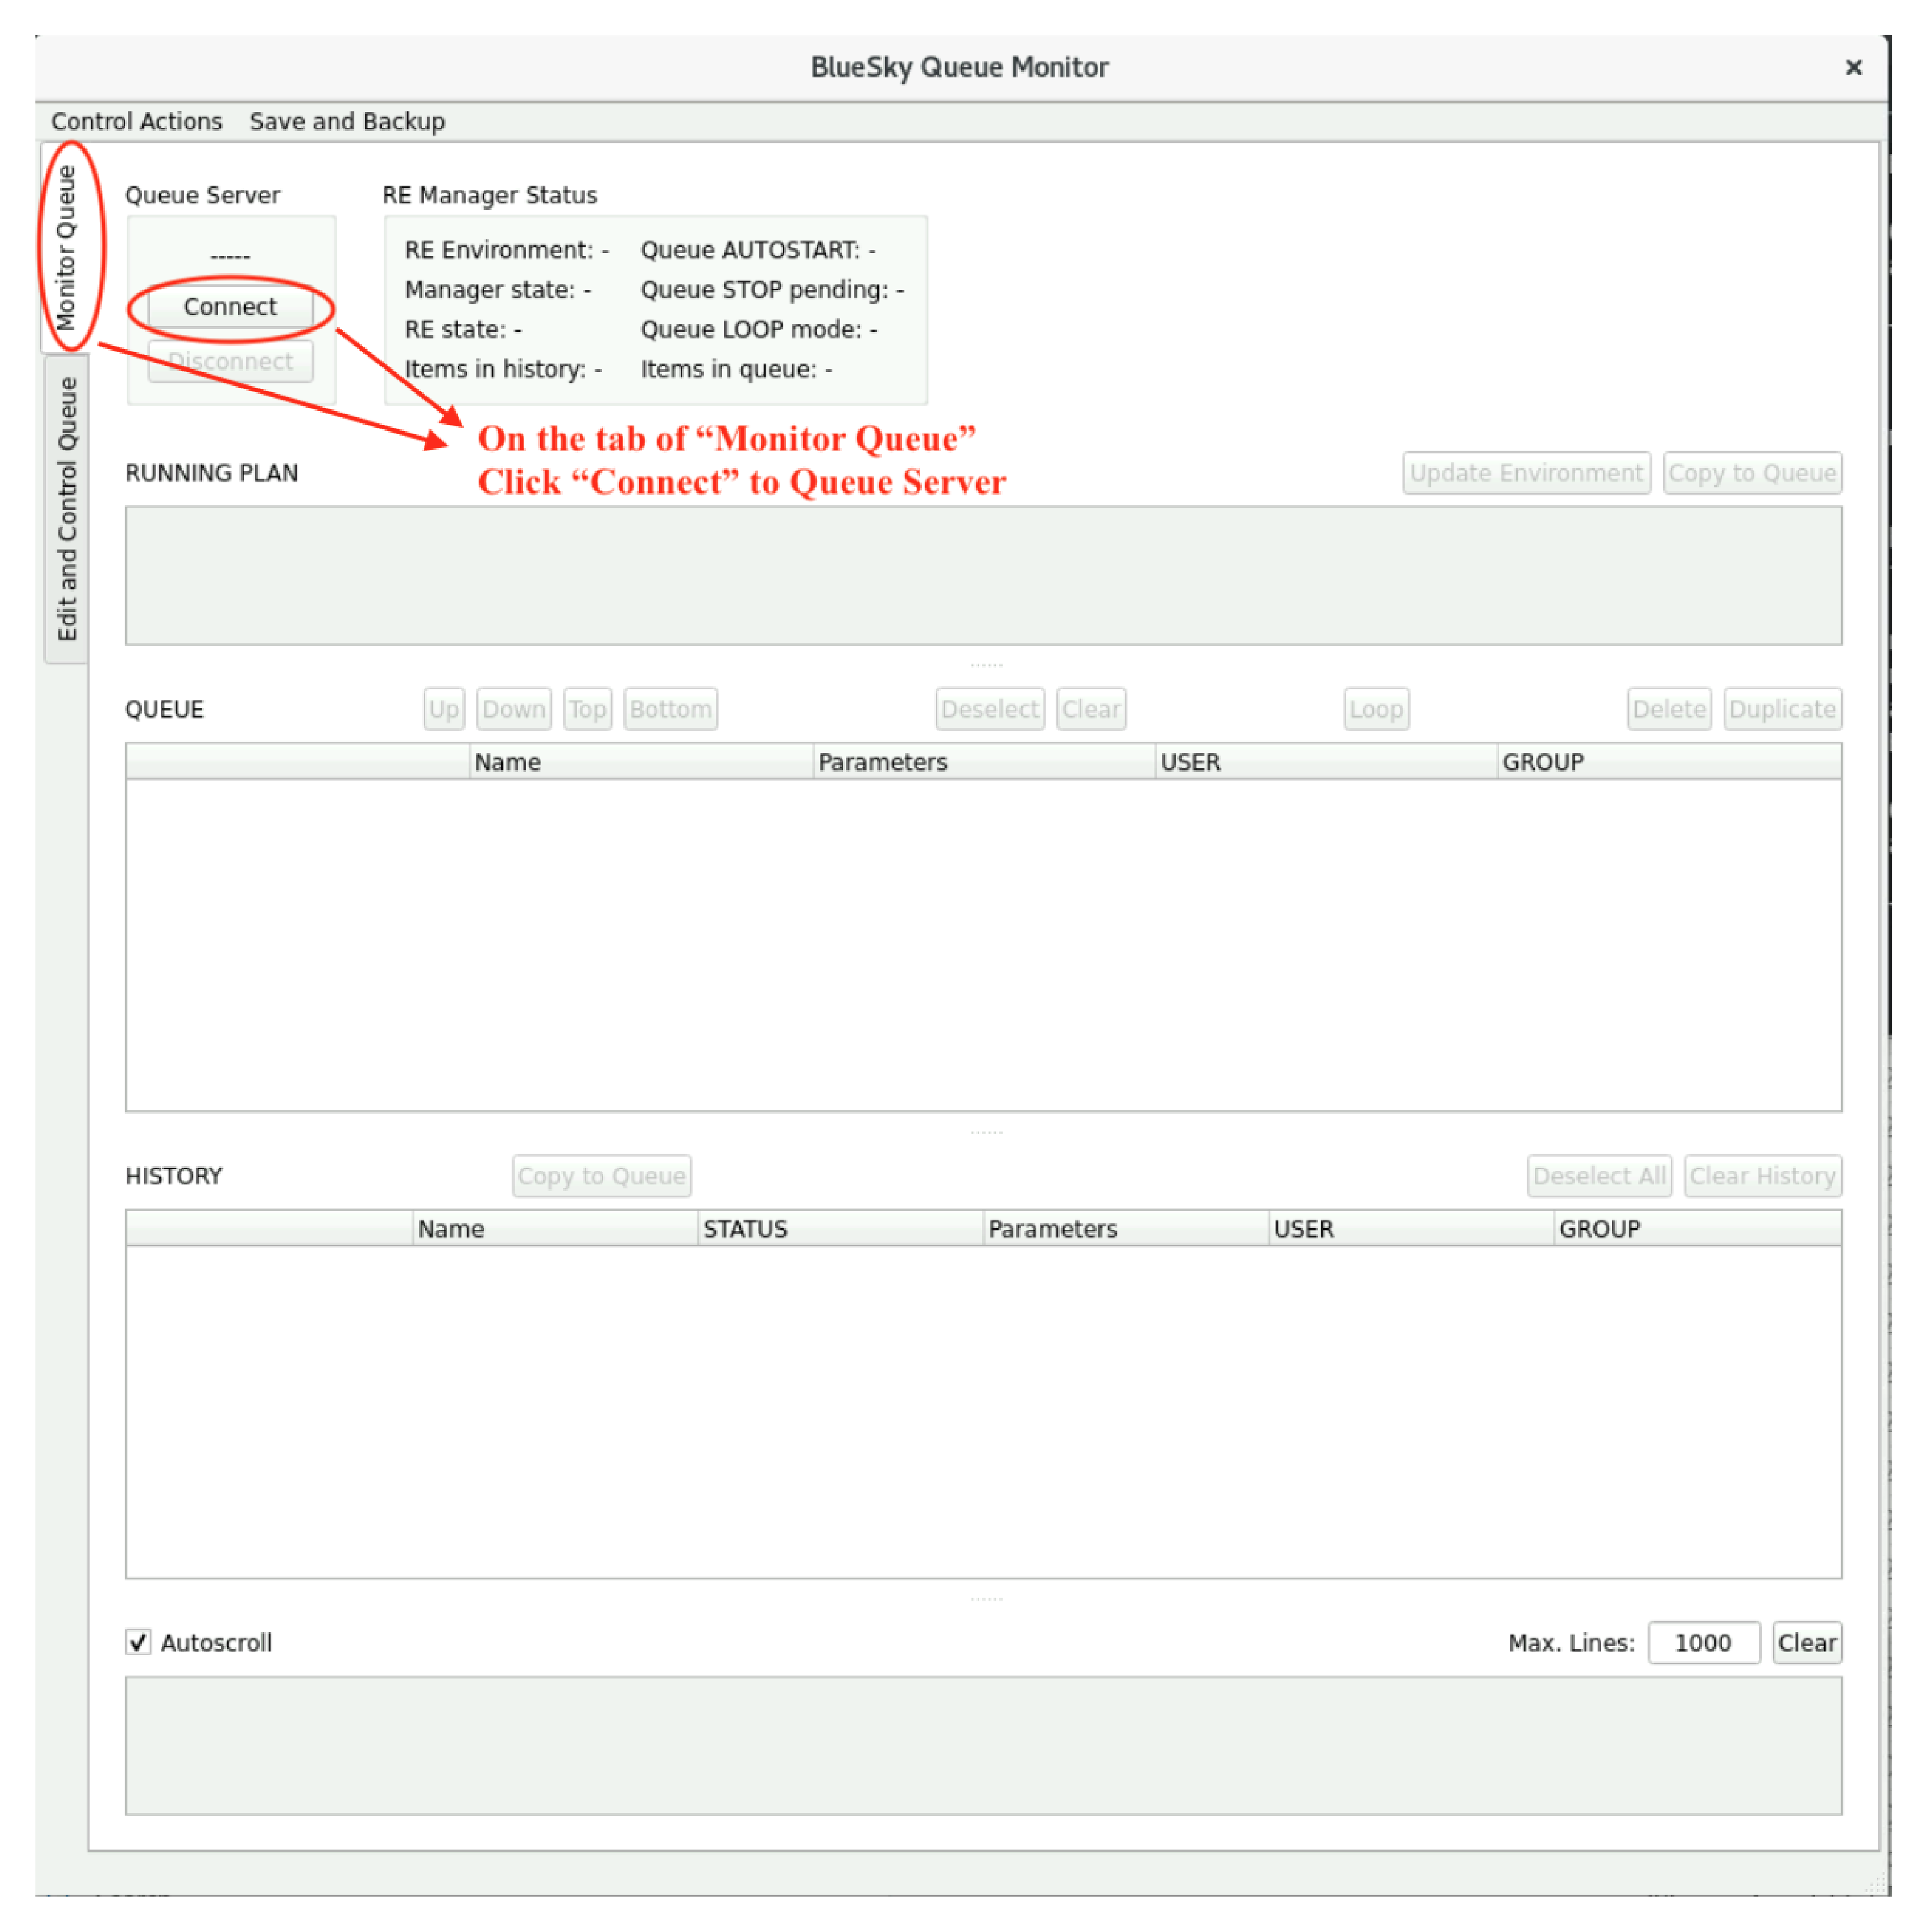

In [1]:
## This cell is to insert the screenshot
from skimage import io
import matplotlib.pyplot as plt
import matplotlib as mpl
# %matplotlib widget
%matplotlib inline

mpl.rcParams['figure.dpi'] = 600
plt.close('all')

png = 'queue_monitor_GUI_01_noted.png'
img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

/tmp/ipykernel_3133214/2025964494.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


(-0.5, 1265.5, 1203.5, -0.5)

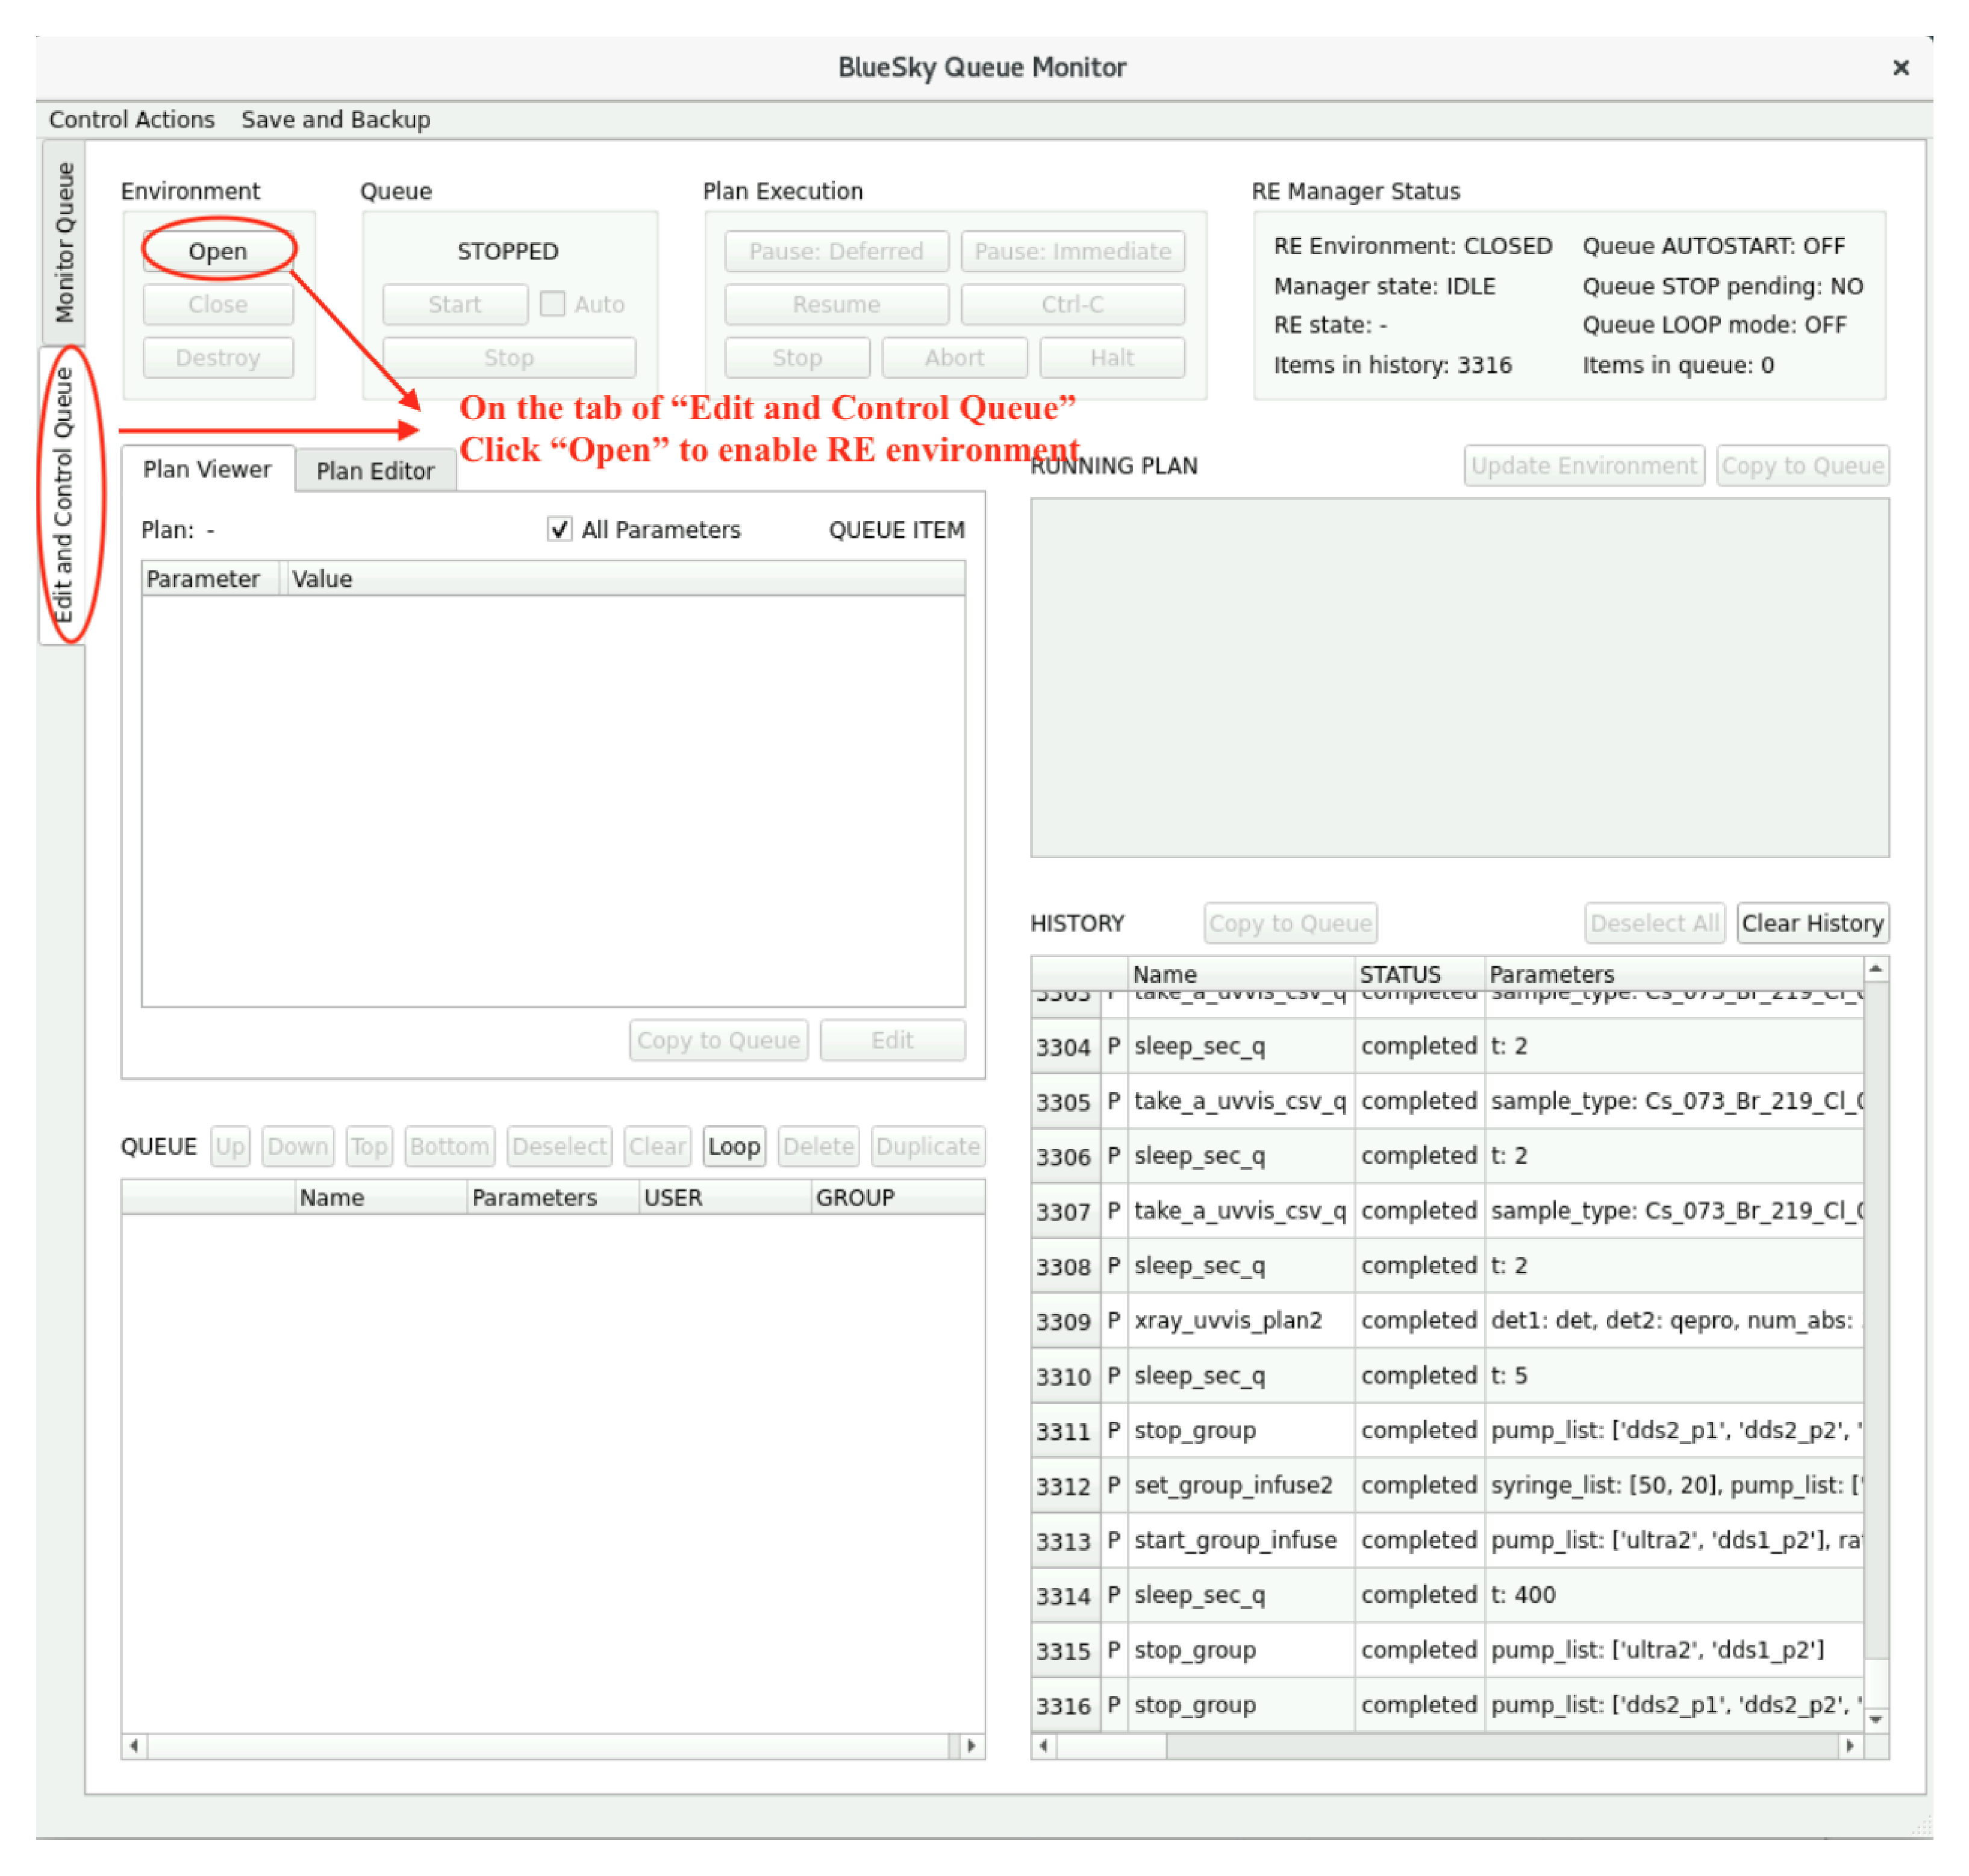

In [2]:
## This cell is to insert the screenshot
png = 'queue_monitor_GUI_02_noted.png'
img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

## 1.2 Dispaly qserver monitor info
### 1.2.1 Open terminal on the work station and enter the following commands

#### For ws3 at XPD beamline:

In [ ]:
~$ conda activate 2025-2.0-py310-tiled
~$ qserver-console-monitor --zmq-info-addr=tcp://xf28id2-ca2:60625

#### For ws1 at 1LL09:

No need to open a terminal for console information.

The console information will be shown on the terminal of start-re-manager.

### If Queue server connected correctly and RE environment open successfully

/tmp/ipykernel_3133214/285100618.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


(-0.5, 1098.5, 286.5, -0.5)

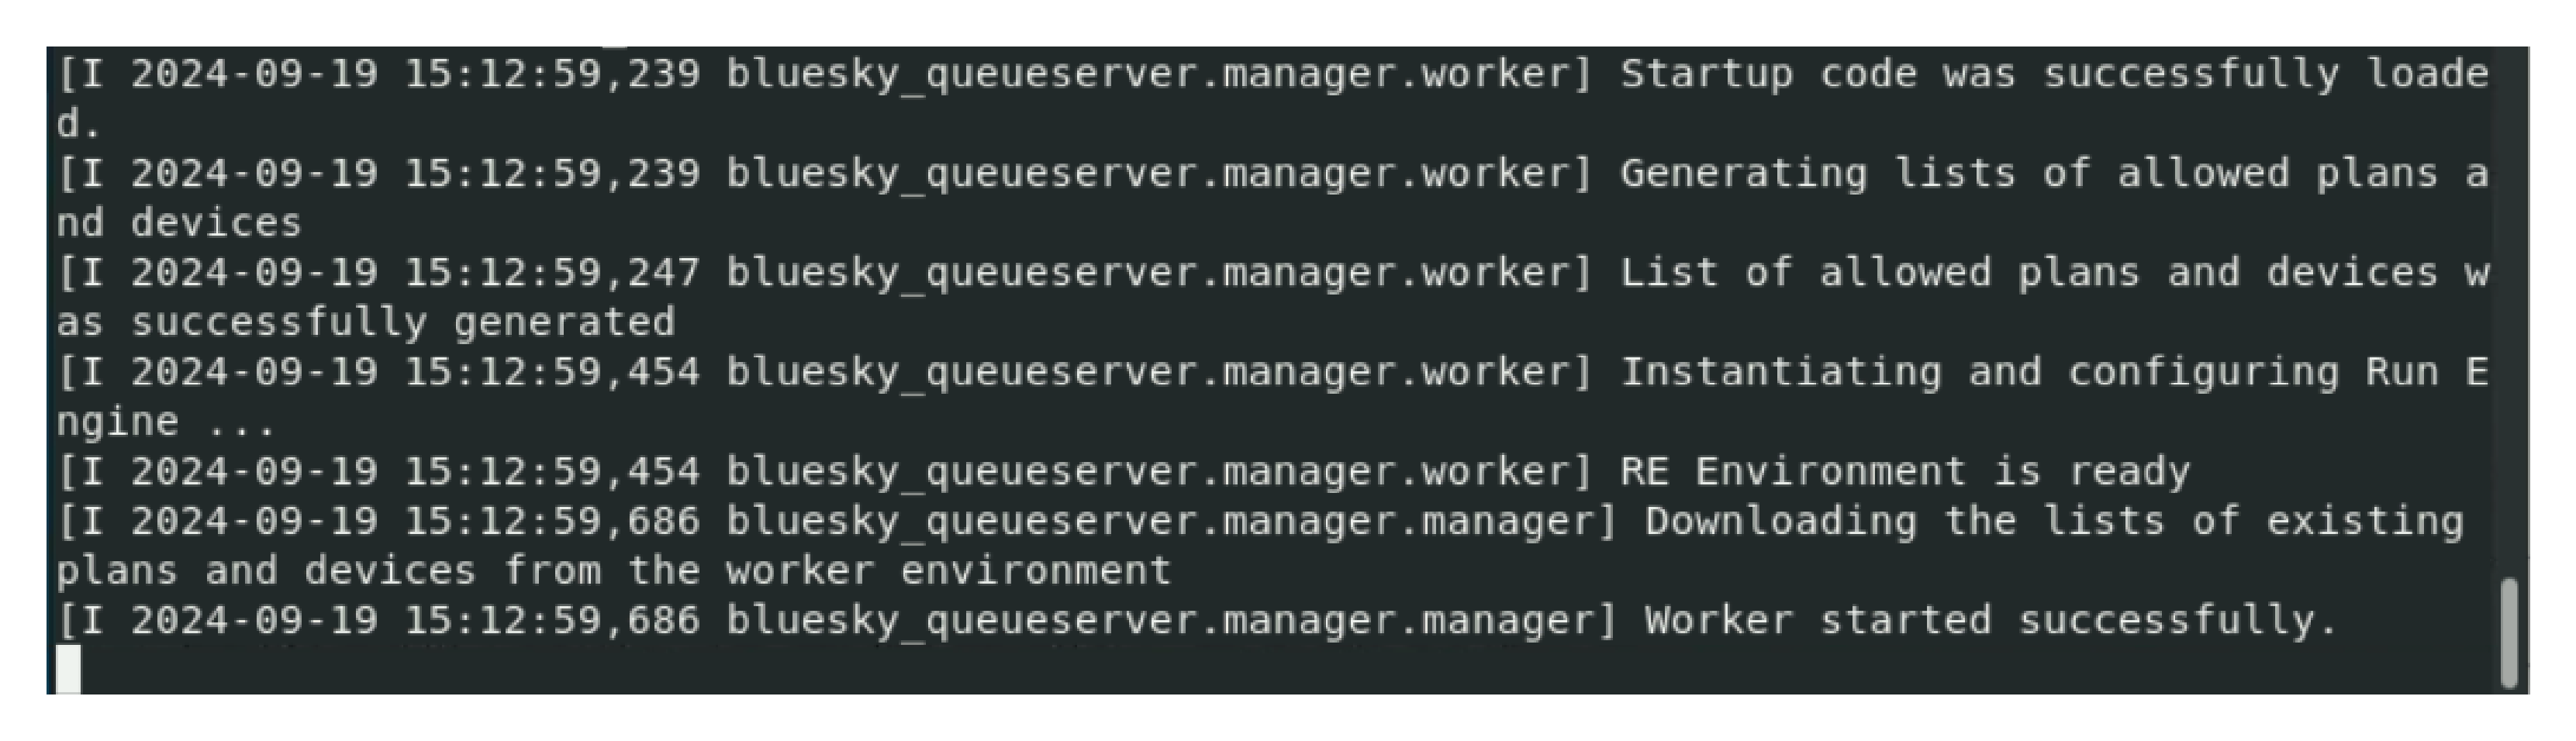

In [3]:
## This cell is to insert the screenshot
png = 'queue_console_01.png'
img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

# 2. Start pdfstream analysis, save, vis servers
## pdfstream analysis, save, vis servers are running on xf28id2-ca2
## Access to ca2 is limited so make sure thery are running when staff support is available

# 3. Activate an conda environment for LDRD kafka

## 3.1 Open terminal on the work station and enter the following commands
### For ws3 at XPD beamline:

In [ ]:
~$ conda activate 2025-2.0-py310-tiled
~$ PYTHONPATH=$BS_PYTHONPATH_310 python kafka_consumer_iterate_XPD_v2.py xpd xpd-analysis

## Reminder: 
### kafka_consumer_iterate_XPD_v2.py arranges all the auto works controlled by qserver (data acquisition) and kafka (data processing)
### Details of kafka_consumer_iterate_XPD_v2.py will be explaned in Section 4
### GitHub link: https://github.com/NSLS2/xpd-profile-collection-ldrd20-31/blob/main/scripts/kafka_consumer_iterate_XPD_v2.py 

### For ws1 at 1LL09 beamline:

while using kafka at Lab, check the topic names subscribed in kafka

In [ ]:
~$ conda activate 2024-2.2-py310-tiled
~$ python kafka_consumer_iterate_1LL09_v2.py xpd-ldrd20-31

## Reminder: 
### blop (package for ML agent), diffpy.pdffit2, diffpy.pdfgetx, ...etc are running in LDRD kafka
### make sure the following packages/version could work 
### (til 2025/0505 diffpy packages are installed in bluesky overlays: BS_PYTHONPATH_310)

In [ ]:
import pymatgen as pm
from diffpy.pdffit2 import PdfFit
from diffpy.Structure import loadStructure
from pyobjcryst import loadCrystal
from diffpy.pdfgetx import PDFConfig  ## .__ver__() >= 2.2.1
from tiled.client import from_uri, from_profile
from blop import Agent, DOF, Objective

# 4. Things to do in LDRD kafka:
### GitHub link: https://github.com/NSLS2/xpd-profile-collection-ldrd20-31/blob/main/scripts/kafka_consumer_iterate_XPD_v2.py 

## 4.1 Before printing scan messages
### 4.1.1. Load data acquisition tasks into qserver from reading inputs_**.xlsx by given sheet name

In [ ]:
xlsx_fn = '/home/xf28id2/.ipython/profile_collection_ldrd20-31/scripts/inputs_qserver_kafka_v2_test.xlsx'

In [ ]:
LK = importlib.import_module("_LDRD_Kafka")
## Input varaibales for Qserver, reading from xlsx_fn by given sheet name
qserver_process = LK.xlsx_to_inputs(LK._qserver_inputs(), xlsx_fn=xlsx_fn, sheet_name='qserver_XPD')
qin = qserver_process.inputs

### 4.1.2. Load data processing tasks into kafka from reading inputs_**.xlsx by given sheet name

In [ ]:
## Input varaibales for Kafka, reading from xlsx_fn by given sheet name
kafka_process = LK.xlsx_to_inputs(LK._kafka_inputs(), xlsx_fn=xlsx_fn, sheet_name='kafka_process', is_kafka=True)
kin = kafka_process.inputs

### 4.1.3 Screenshots
### xlsx link: https://github.com/NSLS2/xpd-profile-collection-ldrd20-31/blob/main/scripts

### 4.1.3.1 input_**.xlsx for input variables of qserver and kafka

/tmp/ipykernel_3133214/2046533597.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


(-0.5, 1357.5, 1233.5, -0.5)

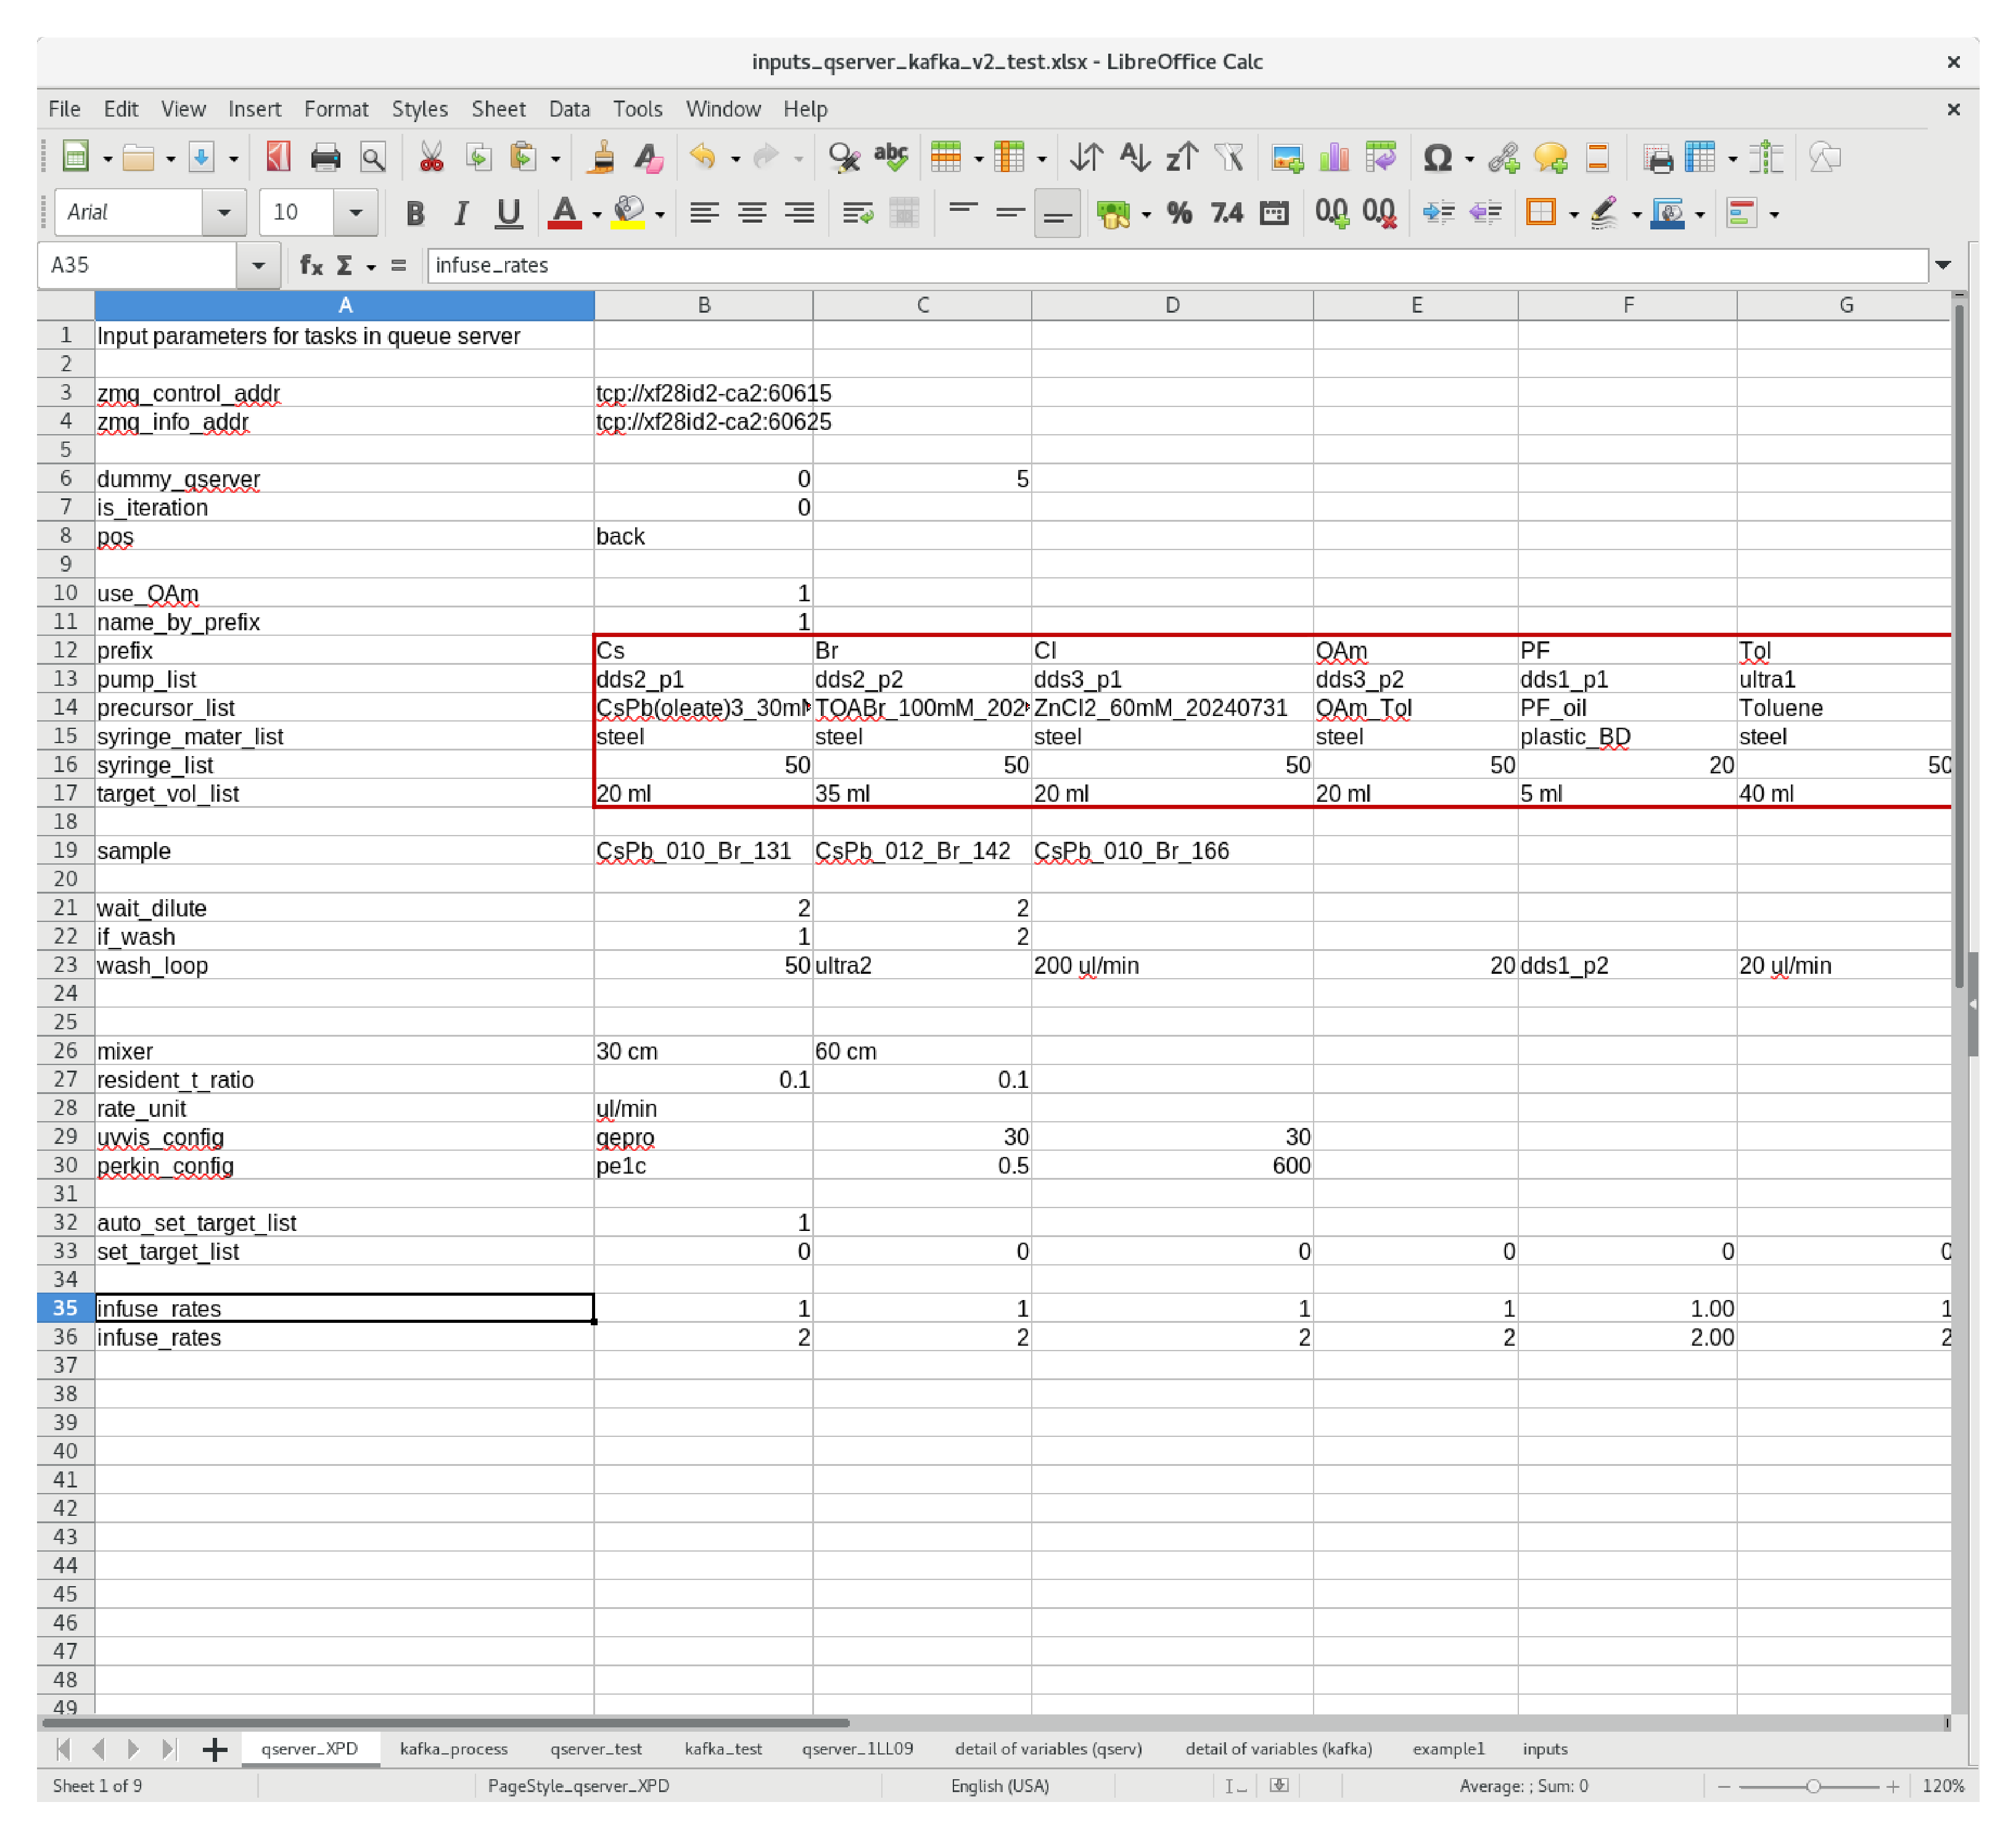

In [6]:
## This cell is to insert the screenshot
png = 'input_xlsx_01.png'
img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

/tmp/ipykernel_3133214/3097150601.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


(-0.5, 1357.5, 1233.5, -0.5)

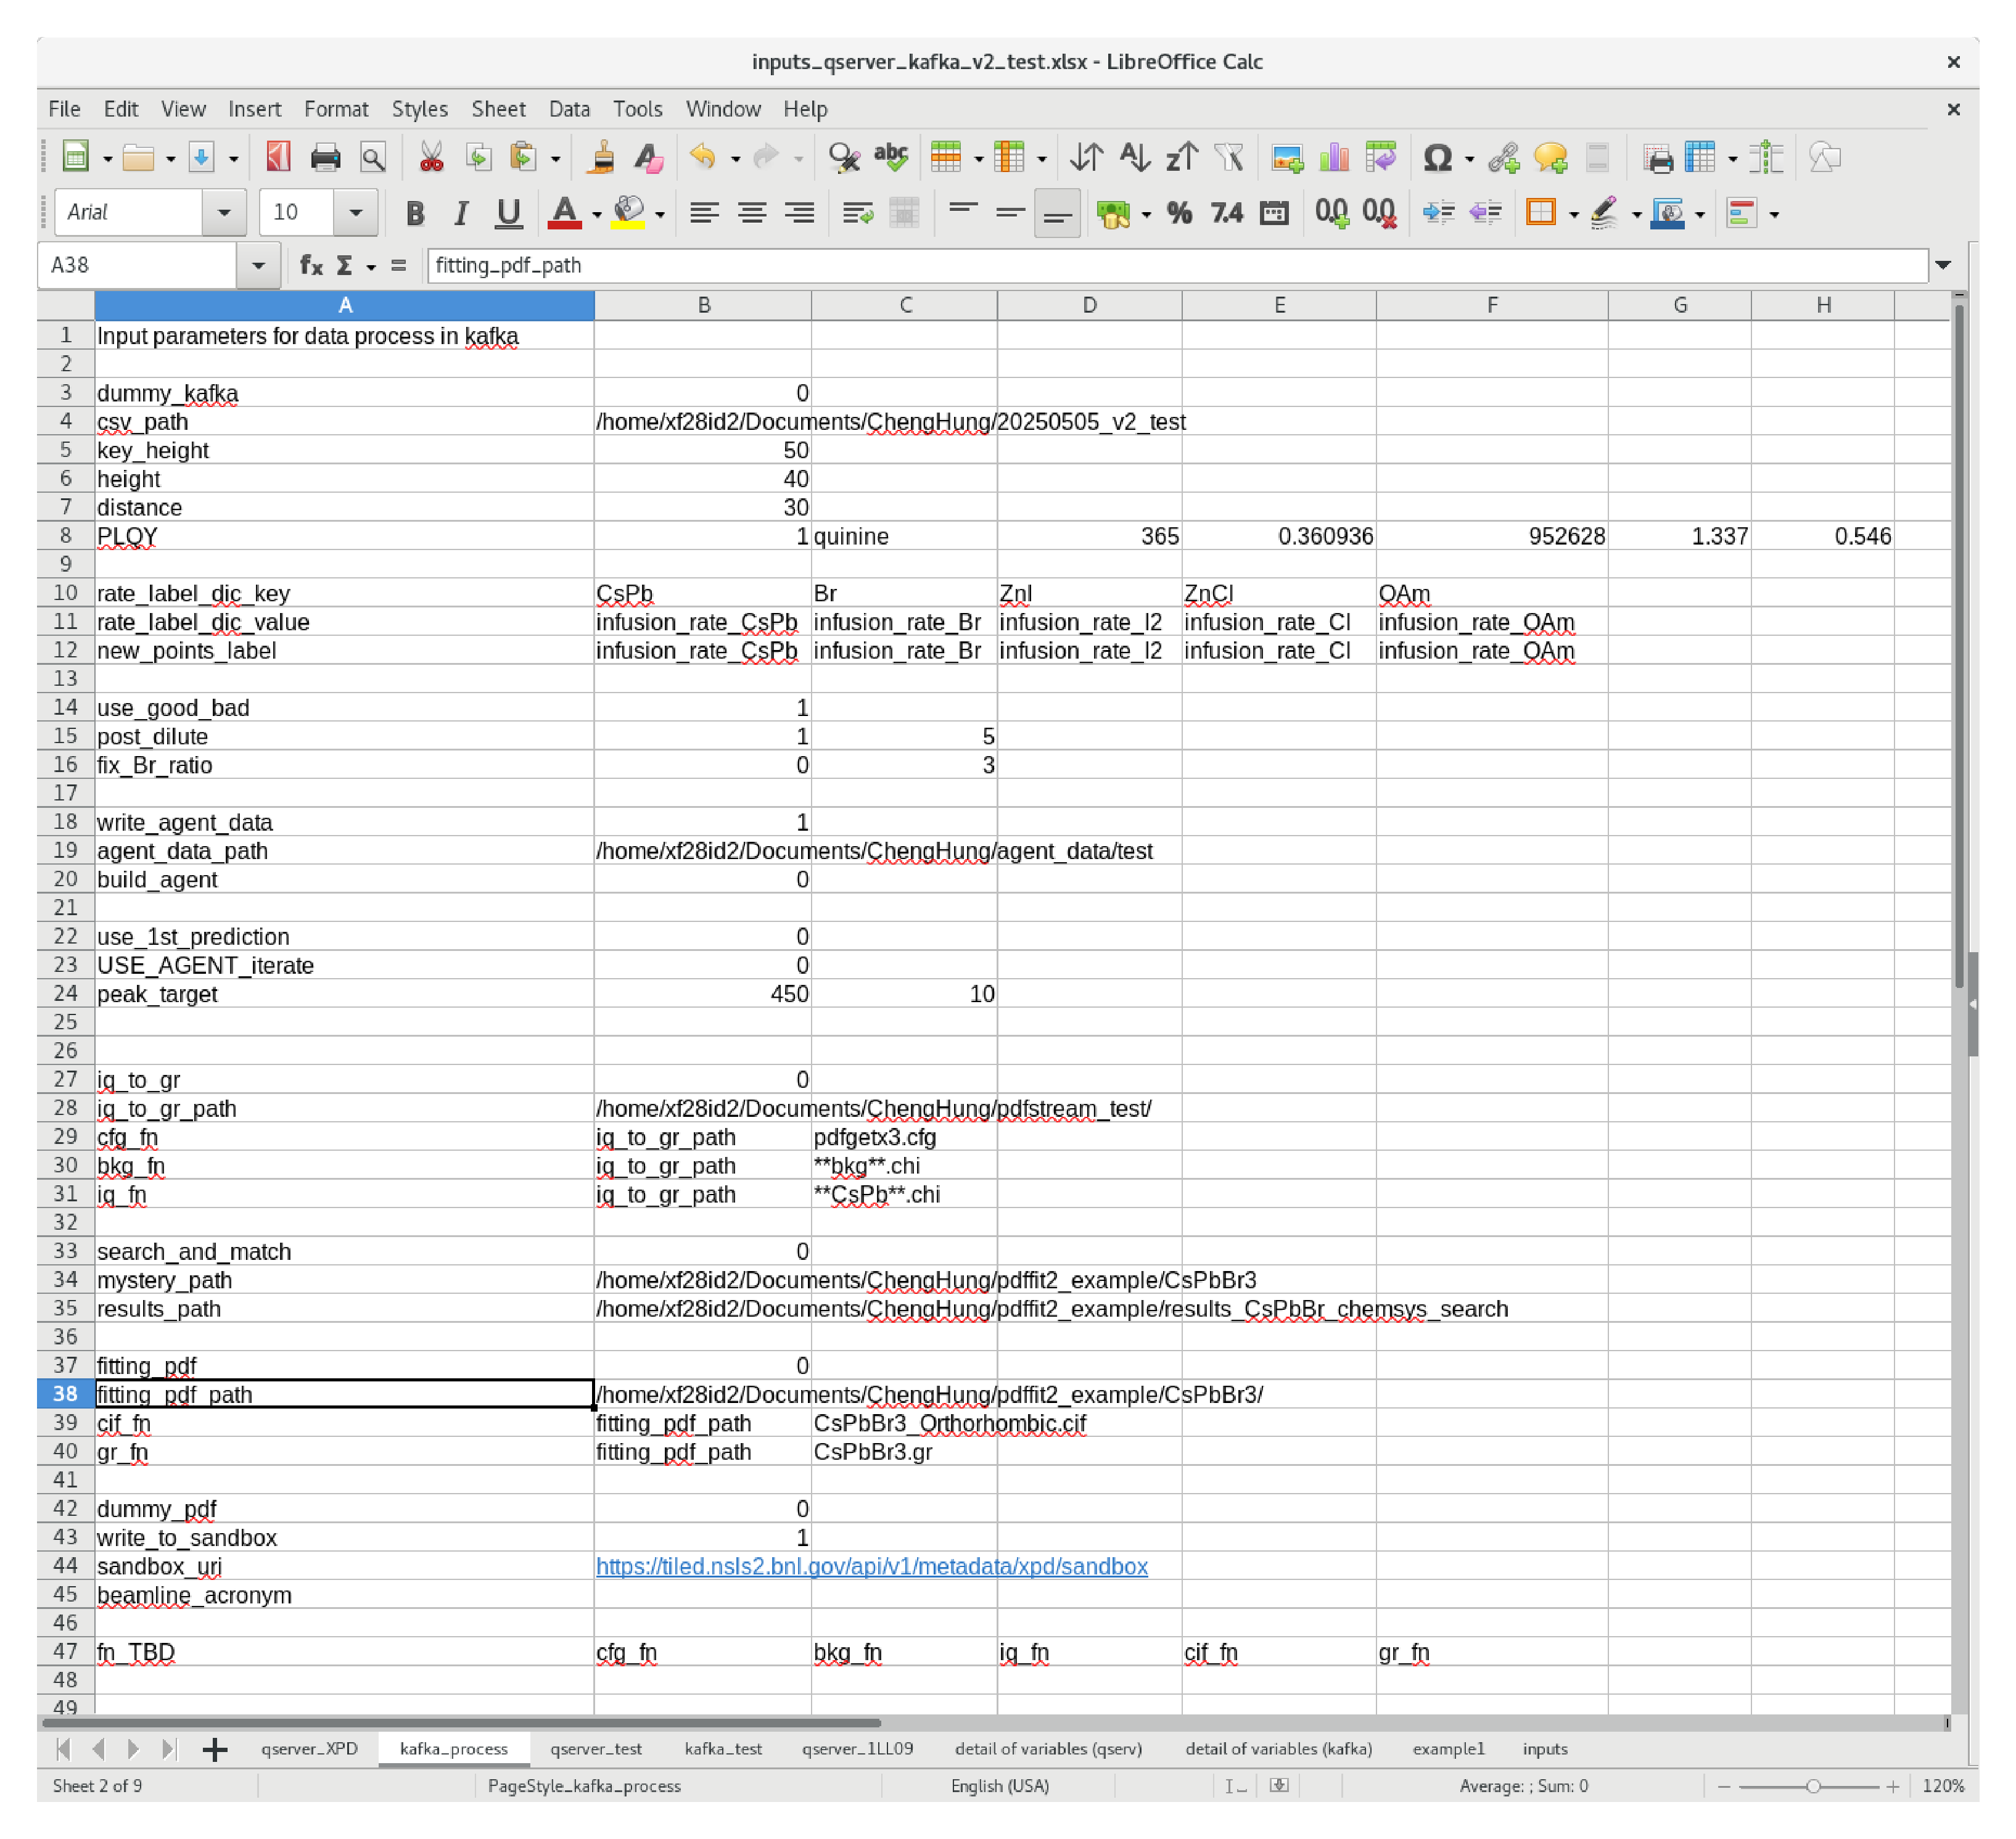

In [7]:
## This cell is to insert the screenshot
png = 'input_xlsx_02.png'
img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

### 4.1.3.2 After loading input_**.xlsx

/tmp/ipykernel_3133214/1296376948.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


(-0.5, 1105.5, 891.5, -0.5)

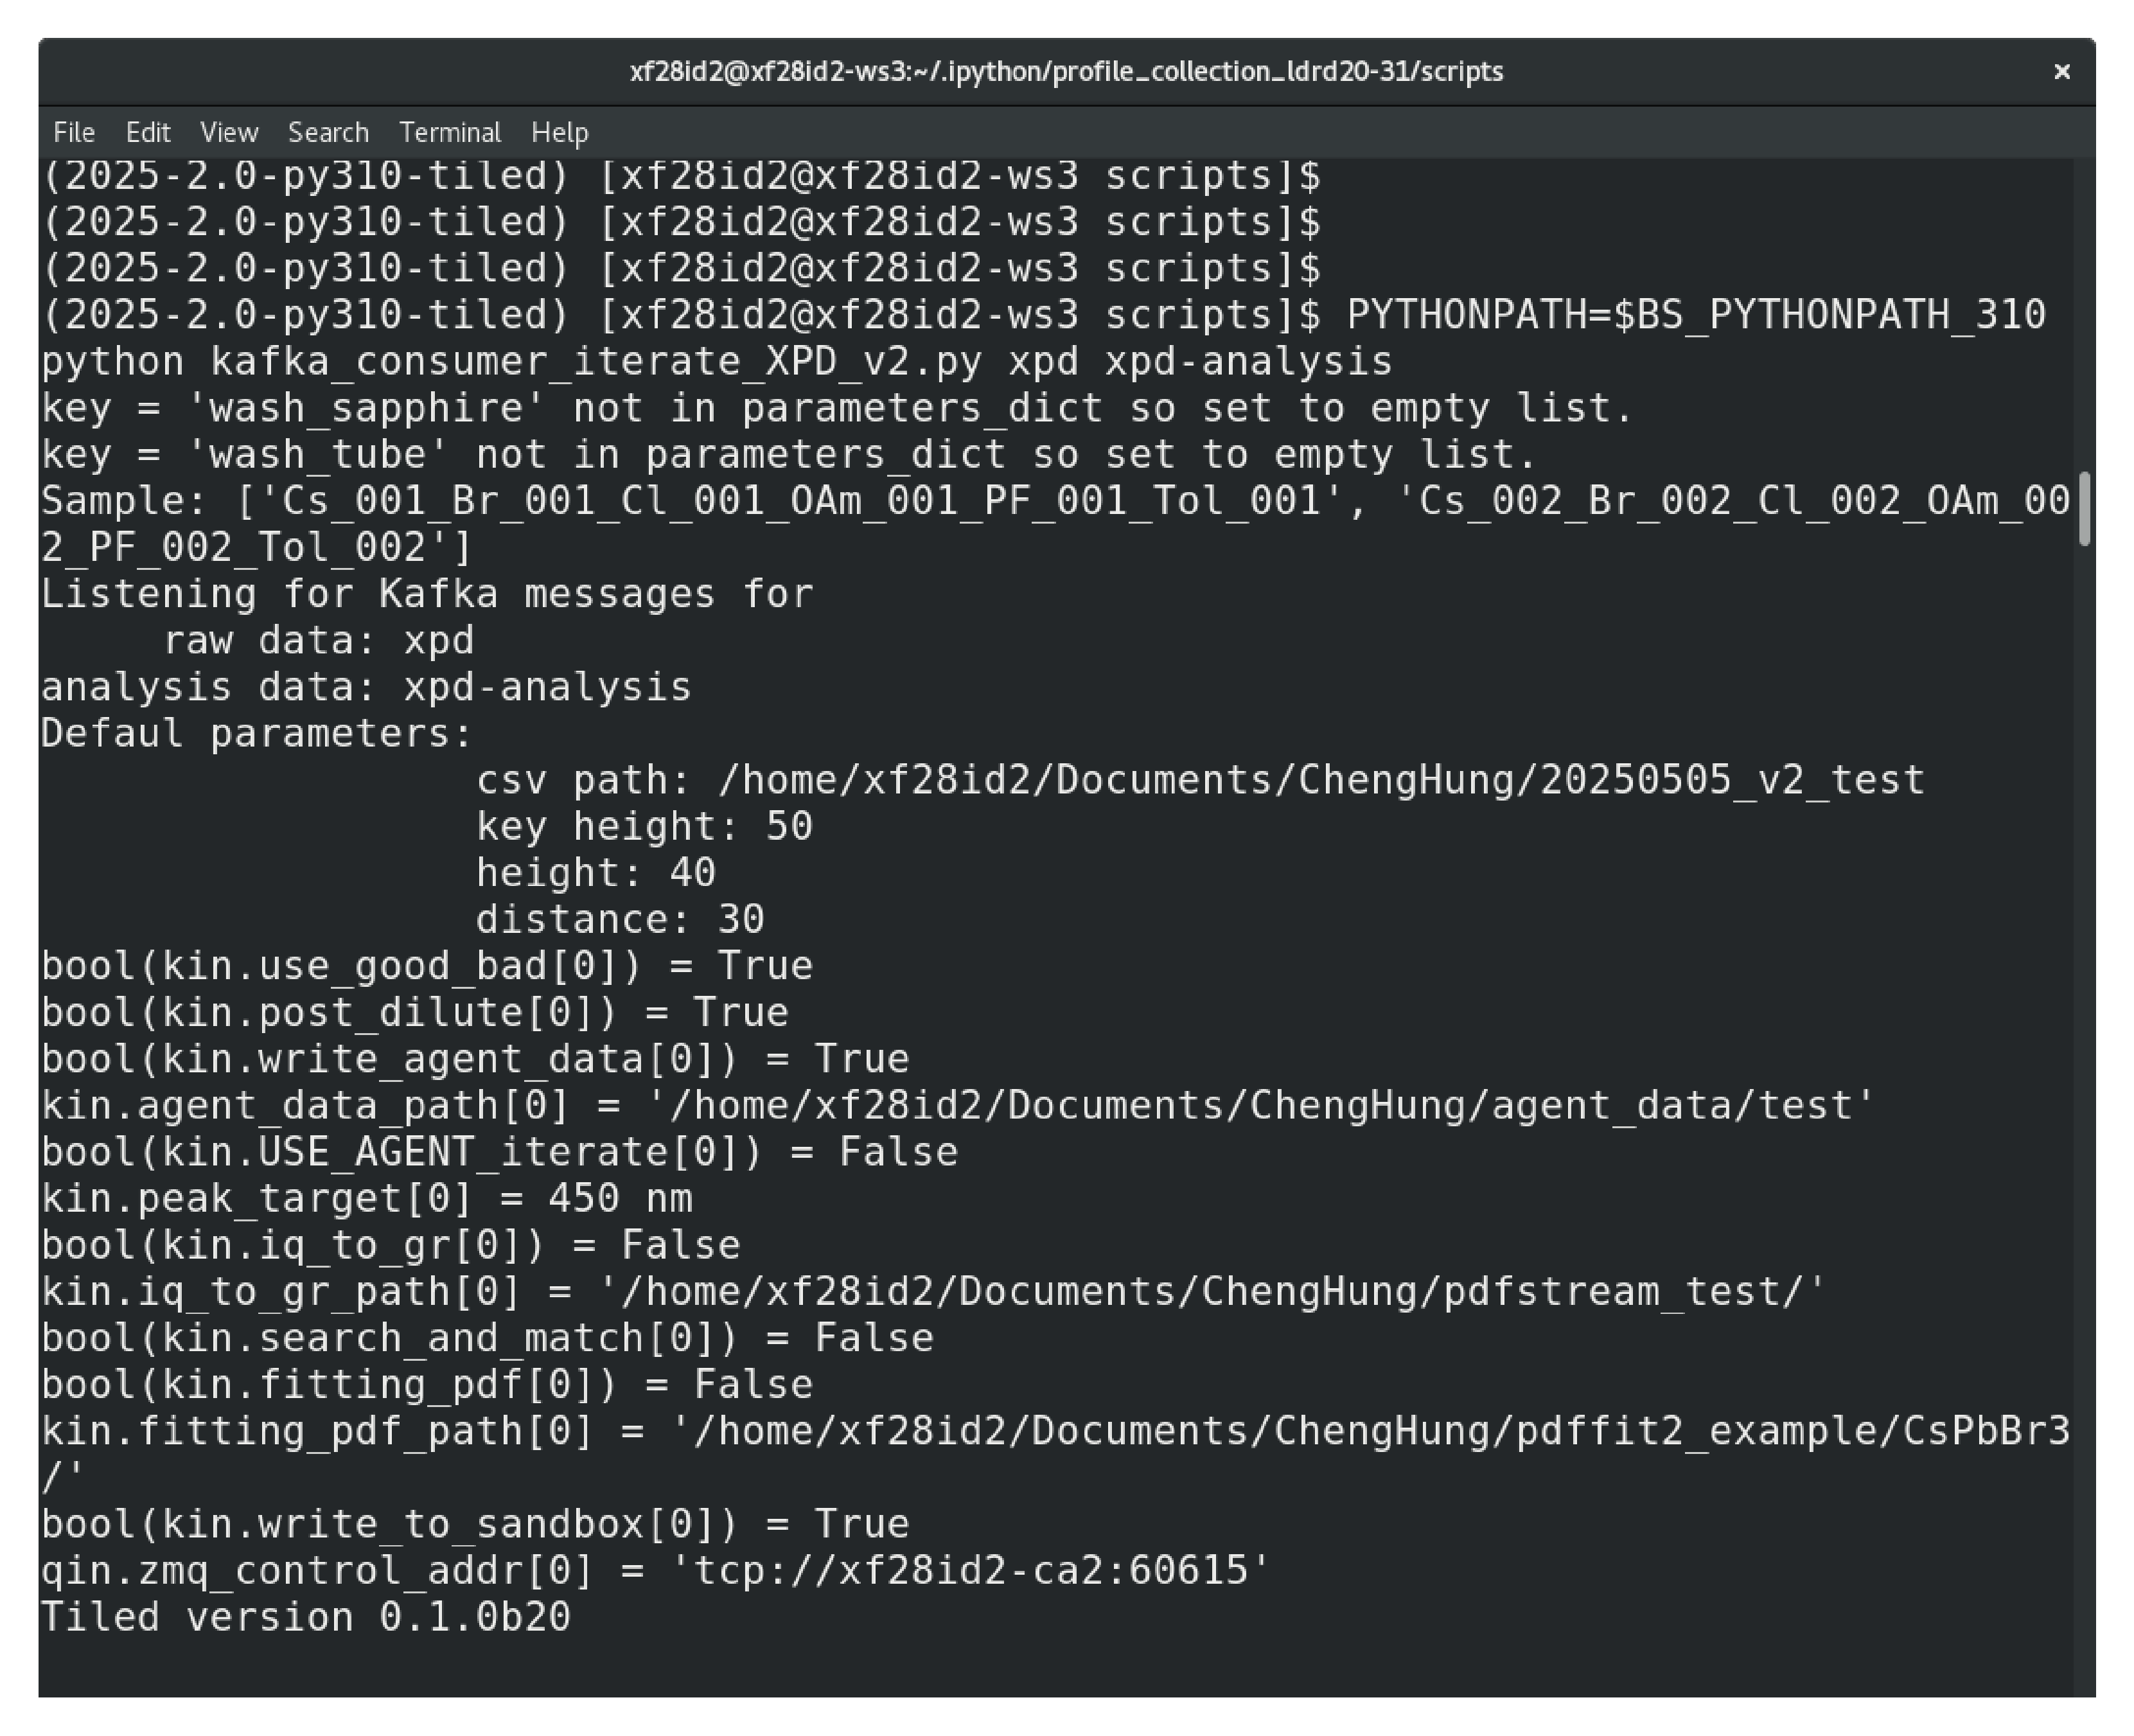

In [8]:
## This cell is to insert the screenshot
png = 'kafka_screen_01.png'
img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

/tmp/ipykernel_3133214/2513212312.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


(-0.5, 1138.5, 1180.5, -0.5)

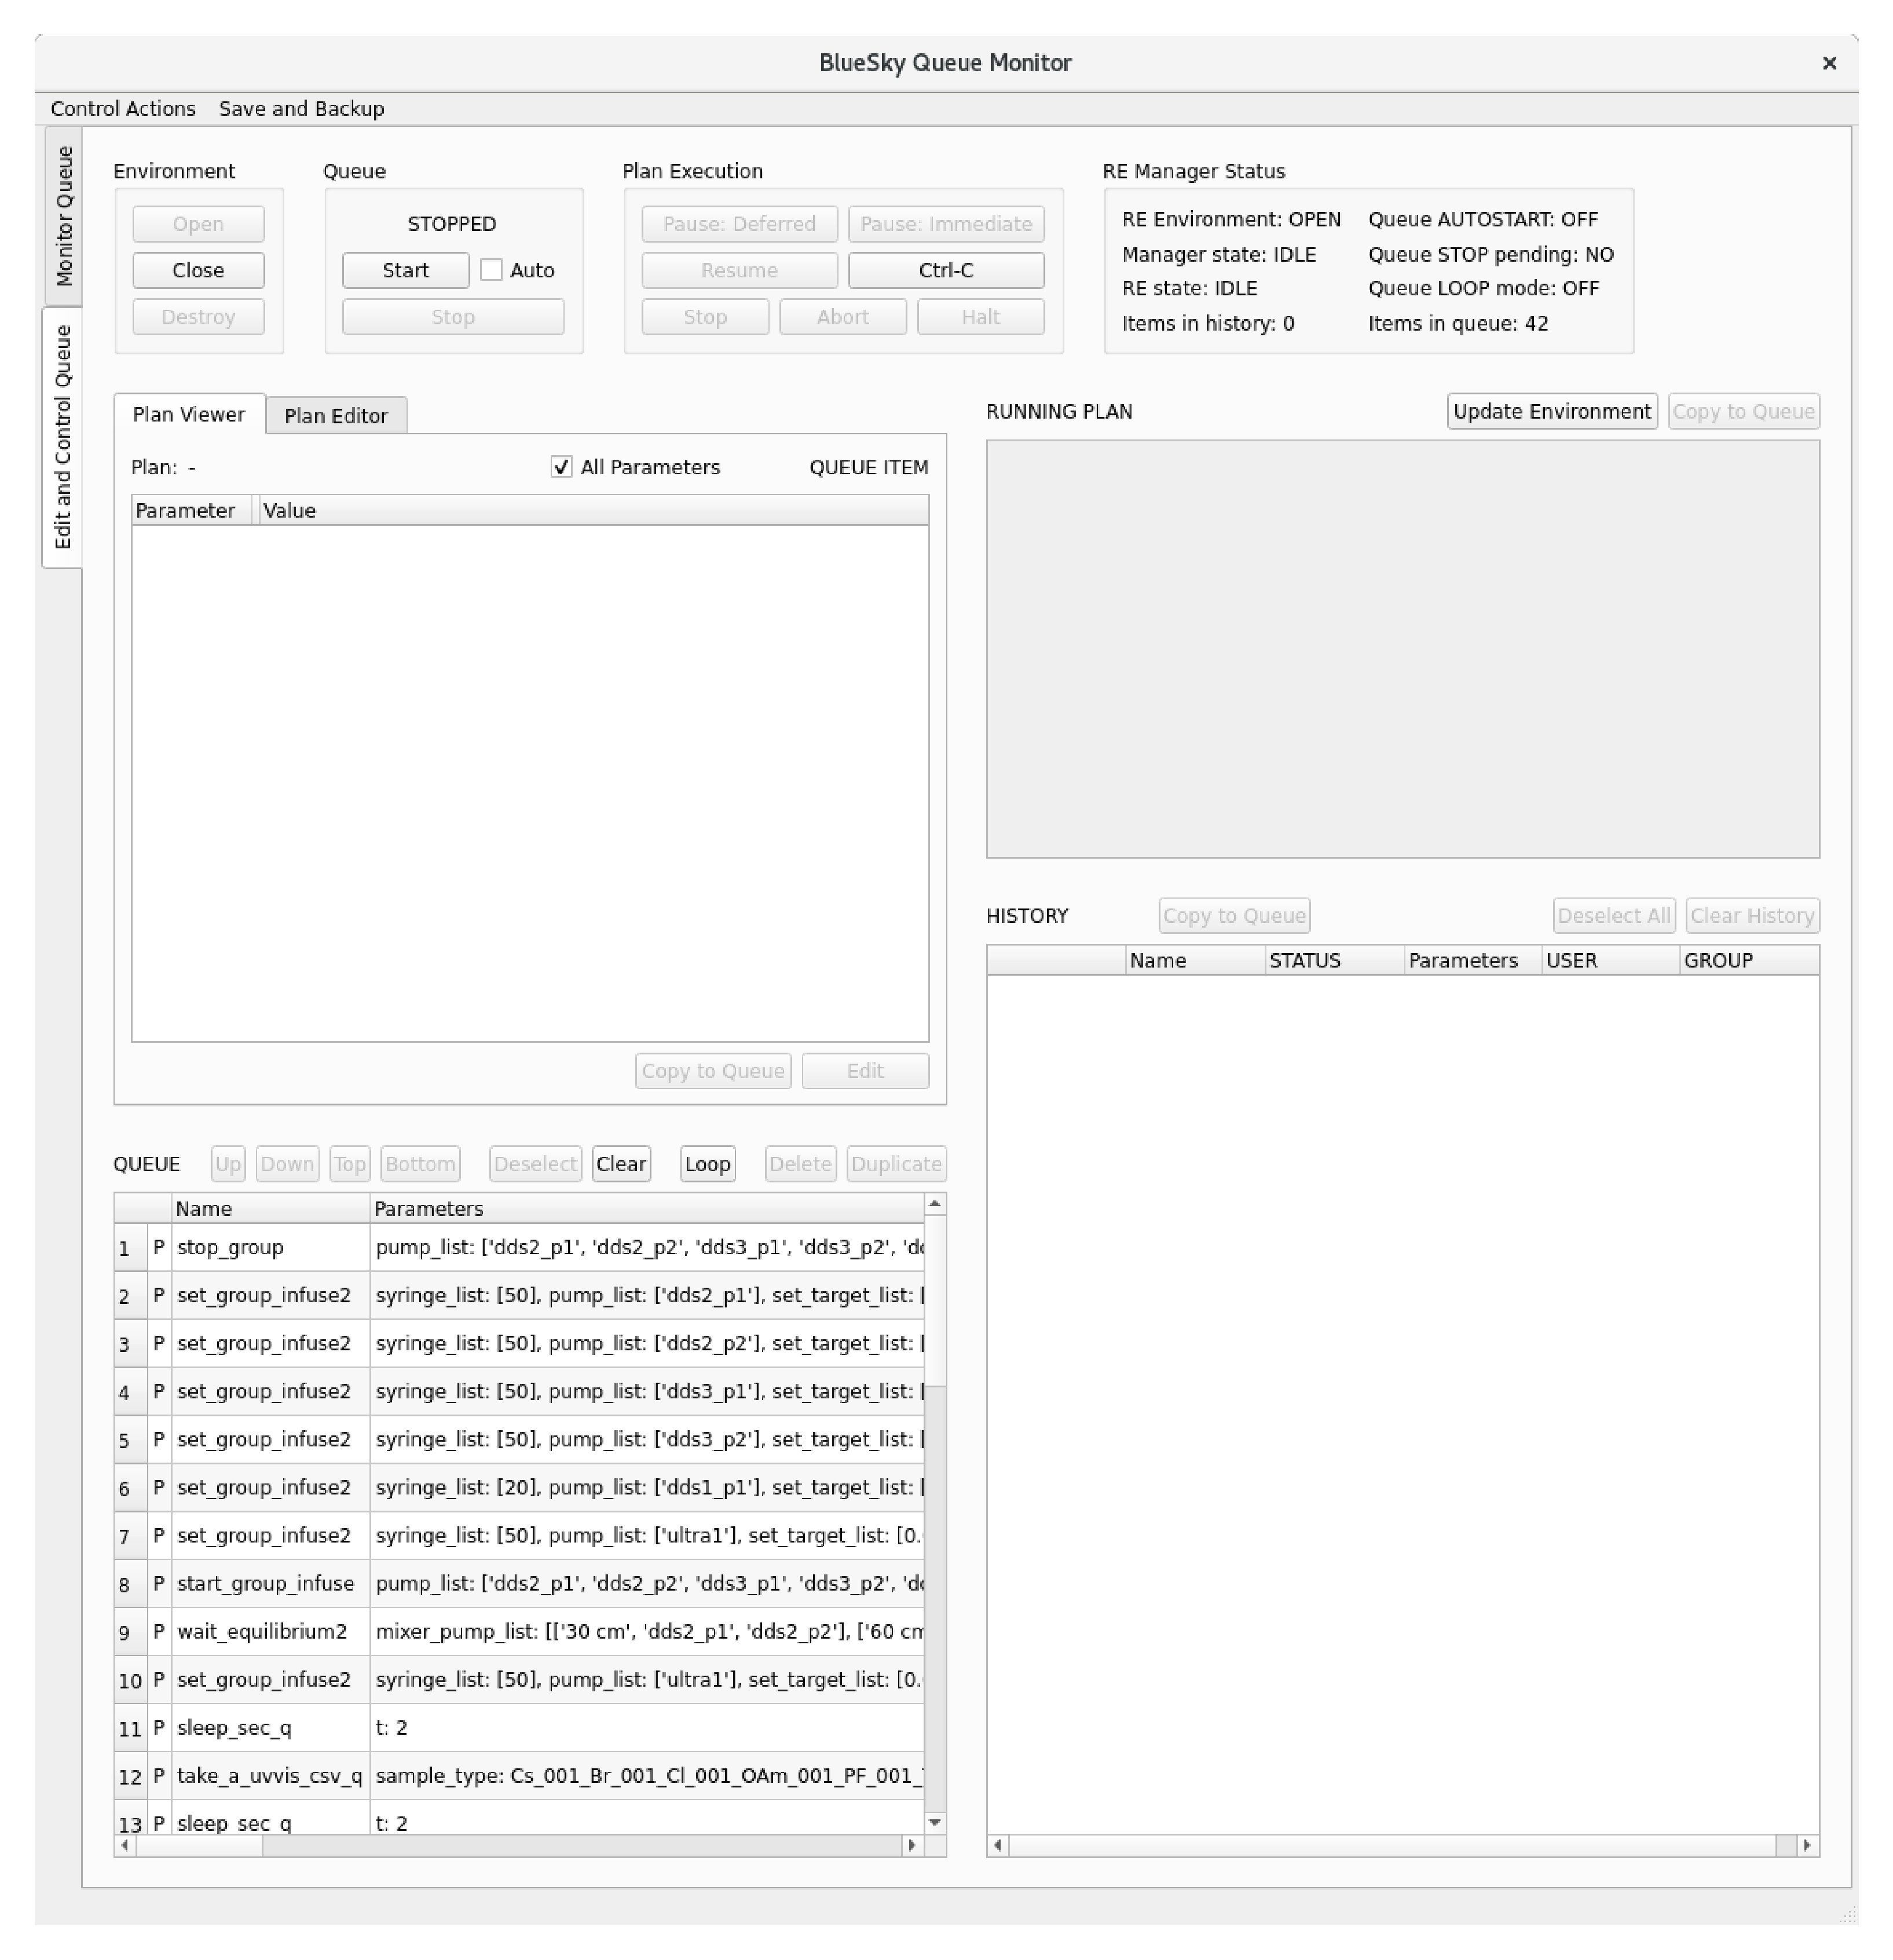

In [9]:
## This cell is to insert the screenshot
png = 'queue_monitor_GUI_03.png'
img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

## 4.2 Printing scan messages

### 4.2.1 Identifiy data (Uv-Vis, X-ray, I(Q) from sandbox, ...)
### In this LDRD work, kafka will listen to two topics: "xpd" and "xpd-analysis"
### From macro_00 to macro_03: kafka will read data according to topic doc, and stream names

## 4.3 After printing scan messages

### 4.3.1 PDF data processing
### From macro_04 to macro_08: I(Q) to g(r), search & match, pdf fitting

### 4.3.2 Uv-Vis data processing
### From macro_09 to macro_13: good/bad data, zero baseline, average, peak fitting, PLQY

### 4.3.3 Post data processing 
### From macro_14 to macro_17: update blop-agent if True, save data to sandbox, add itration if True

# Reference
## R1. Data Model of BlueSky

https://blueskyproject.io/event-model/main/user/explanations/data-model.html#data-model

/tmp/ipykernel_3133214/3683846775.py:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


(-0.5, 863.5, 1271.5, -0.5)

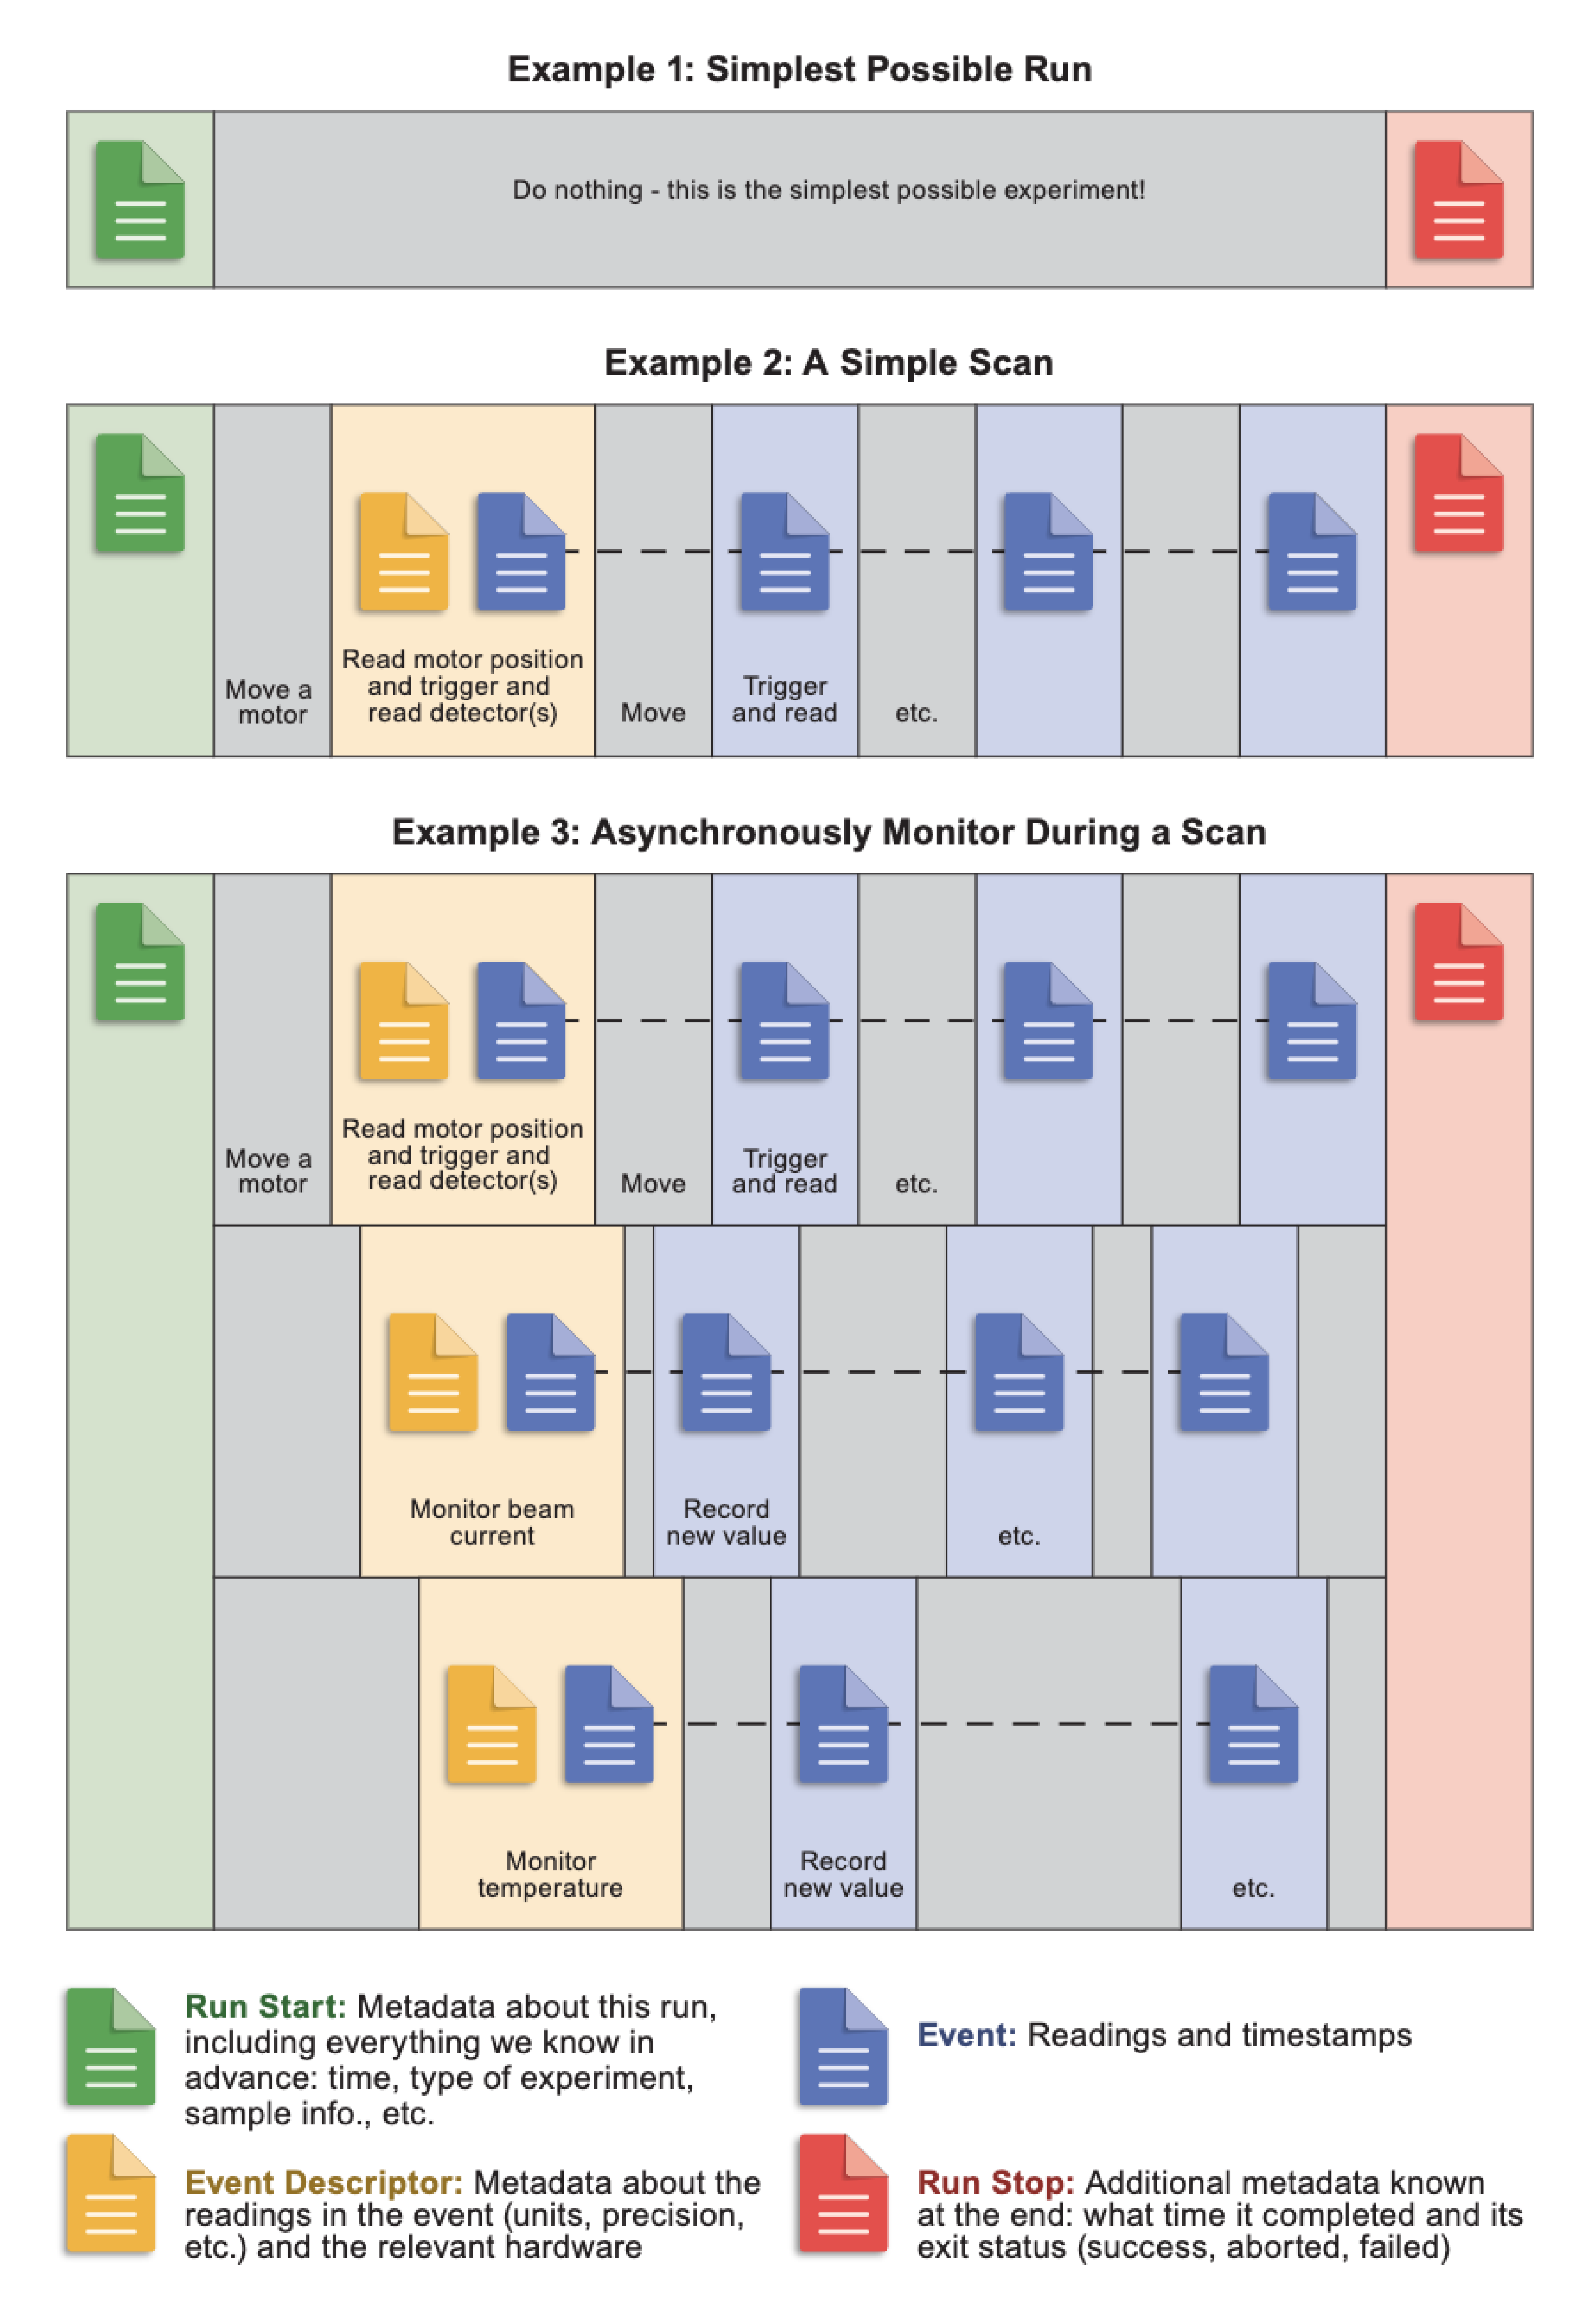

In [11]:
import os
# import imageio.v2 as imageio
import matplotlib.pyplot as plt
# %matplotlib widget

plt.close('all')
cwd = os.getcwd()
png = cwd + '/document-generation-timeline.png'
img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

## R2. Check or Test blop ML agent

In [ ]:
~$ conda activate 2024-1.0-py310-tiled-blop  # same env as LDRD-kafka

~$ ipython

In [ ]:
$run -i ~/.ipython/profile_collection_ldrd20-31/scripts/prepare_agent_pdf.py

In [ ]:
agent = build_agen(peak_target=660, peak_tolerance=5, size_target=6, agent_data_path='/')